# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from prettytable import PrettyTable
import requests
import csv

# Extract the data from openAQ API 

In [2]:
result = requests.get("https://api.openaq.org/v1/locations?country[]=IN&parameter[]=co&parameter[]=pm25&parameter[]=pm10&parameter[]=so2&parameter[]=no2&parameter[]=o3&has_geo=true")
result.status_code

200

# Visualize the data as in JSON format

In [3]:
json_data = result.json()
json_data

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0',
  'website': 'https://docs.openaq.org/',
  'page': 1,
  'limit': 100,
  'found': 321},
 'results': [{'id': 'IN-35',
   'country': 'IN',
   'city': 'Agra',
   'cities': ['Agra'],
   'location': 'Sanjay Palace, Agra - UPPCB',
   'locations': ['Sanjay Palace', 'Sanjay Palace, Agra - UPPCB'],
   'sourceName': 'caaqm',
   'sourceNames': ['CPCB', 'data.gov.in', 'caaqm'],
   'sourceType': 'government',
   'sourceTypes': ['government'],
   'coordinates': {'longitude': 78.00598, 'latitude': 27.19866},
   'firstUpdated': '2016-03-22T00:20:00.000Z',
   'lastUpdated': '2020-10-11T12:45:00.000Z',
   'parameters': ['co', 'no2', 'o3', 'pm25', 'so2'],
   'countsByMeasurement': [{'parameter': 'co', 'count': 58290},
    {'parameter': 'no2', 'count': 34388},
    {'parameter': 'o3', 'count': 59983},
    {'parameter': 'pm25', 'count': 58829},
    {'parameter': 'so2', 'count': 42840}],
   'count': 254330},
  {'id': 'IN-101',
   'country': 'IN',
   'c

In [4]:
column_data = json_data['results']
column_data

[{'id': 'IN-35',
  'country': 'IN',
  'city': 'Agra',
  'cities': ['Agra'],
  'location': 'Sanjay Palace, Agra - UPPCB',
  'locations': ['Sanjay Palace', 'Sanjay Palace, Agra - UPPCB'],
  'sourceName': 'caaqm',
  'sourceNames': ['CPCB', 'data.gov.in', 'caaqm'],
  'sourceType': 'government',
  'sourceTypes': ['government'],
  'coordinates': {'longitude': 78.00598, 'latitude': 27.19866},
  'firstUpdated': '2016-03-22T00:20:00.000Z',
  'lastUpdated': '2020-10-11T12:45:00.000Z',
  'parameters': ['co', 'no2', 'o3', 'pm25', 'so2'],
  'countsByMeasurement': [{'parameter': 'co', 'count': 58290},
   {'parameter': 'no2', 'count': 34388},
   {'parameter': 'o3', 'count': 59983},
   {'parameter': 'pm25', 'count': 58829},
   {'parameter': 'so2', 'count': 42840}],
  'count': 254330},
 {'id': 'IN-101',
  'country': 'IN',
  'city': 'Ahmedabad',
  'cities': ['Ahmedabad', 'On the terrace of Water distribution Center'],
  'location': 'Maninagar, Ahmedabad - GPCB',
  'locations': ['Maninagar, Ahmedabad - G

# Extract information from json data in the form of table 

Make a Pretty Table.

Select then columns for the table.

Add the data row by row .

In [5]:
tableobj = PrettyTable()
for col in column_data:
    mylist = col['countsByMeasurement']
    loc_id = col['id']
    city_name = col['city']
    logitude = col['coordinates']['longitude']
    latitude = col['coordinates']['latitude']
    tot_count = col['count']
    for d in mylist:
        if d['parameter']=='co':
            co_count = d['count']
        elif d['parameter']=='no2':
            no2_count = d['count']
        elif d['parameter']=='o3':
            o3_count = d['count']
        elif d['parameter']=='pm25':
            pm25_count = d['count']
        elif d['parameter']=='so2':
            so2_count = d['count']
    tableobj.add_row([loc_id,city_name,logitude,latitude,co_count,no2_count,o3_count,pm25_count,so2_count,tot_count])
    
tableobj.field_names = ["Id","City","Longitude","Latitude","CO count","NO2 count","O3 count","PM2.5 count","SO2 count","Total count"]    
print(tableobj)    

+--------+----------------+-----------+----------+----------+-----------+----------+-------------+-----------+-------------+
|   Id   |      City      | Longitude | Latitude | CO count | NO2 count | O3 count | PM2.5 count | SO2 count | Total count |
+--------+----------------+-----------+----------+----------+-----------+----------+-------------+-----------+-------------+
| IN-35  |      Agra      |  78.00598 | 27.19866 |  58290   |   34388   |  59983   |    58829    |   42840   |    254330   |
| IN-101 |   Ahmedabad    |  72.59191 | 23.00266 |  35724   |   36031   |  35811   |    36055    |   35110   |    203494   |
| IN-314 |     Aizawl     |  92.71928 | 23.71763 |   4953   |    4953   |   4953   |     4953    |    4953   |    29718    |
| IN-143 |     Ajmer      |  74.64659 | 26.47086 |  32976   |   32979   |  32627   |    32968    |   32985   |    197510   |
| IN-72  |      Alwar     |  76.61153 | 27.55479 |  37567   |   37579   |  36583   |    37521    |   37525   |    224357   |


# Function to convert Pretty table to csv file 

In [6]:
def ptable_to_csv(table, filename, headers=True):
    """Save PrettyTable results to a CSV file
    :param table:  Pretty Table object to get data from.
    :param filename: Filepath for the output CSV.
    :param headers: Whether to include the header row in the CSV (Boolean).
    :return: None
    """
    raw = table.get_string()
    data = [tuple(filter(None, map(str.strip, splitline)))
            for line in raw.splitlines()
            for splitline in [line.split('|')] if len(splitline) > 1]
    if table.title is not None:
        data = data[1:]
    if not headers:
        data = data[1:]
    with open(filename, 'w') as f:
        for d in data:
            f.write('{}\n'.format(','.join(d)))

# Convert the Pretty Table into csv file 

In [7]:
ptable_to_csv(tableobj,'/Users/Dell/output.csv',True)
df = pd.read_csv("output.csv")
df.head()

,Id,City,Longitude,Latitude,CO count,NO2 count,O3 count,PM2.5 count,SO2 count,Total count
0,IN-35,Agra,78.00598,27.19866,58290,34388,59983,58829,42840,254330
1,IN-101,Ahmedabad,72.59191,23.00266,35724,36031,35811,36055,35110,203494
2,IN-314,Aizawl,92.71928,23.71763,4953,4953,4953,4953,4953,29718
3,IN-143,Ajmer,74.64659,26.47086,32976,32979,32627,32968,32985,197510
4,IN-72,Alwar,76.61153,27.55479,37567,37579,36583,37521,37525,224357


# Exploratry analysis

In [8]:
df.shape

(100, 10)

In [9]:
df.describe()

,Longitude,Latitude,CO count,NO2 count,O3 count,PM2.5 count,SO2 count,Total count
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,77.644582,23.242198,20441.50000,20695.260000,18985.560000,20144.570000,18075.140000,106817.300000
std,2.293822,7.104312,13290.07493,12621.317241,12426.335586,12753.983556,11995.223596,68249.171543
min,72.591910,10.942450,1.00000,1.000000,1.000000,1.000000,8.000000,4.000000
25%,77.089645,13.165785,13100.00000,15149.750000,6841.250000,11813.500000,6518.500000,56835.000000
50%,77.245230,28.505295,22393.50000,22449.000000,22030.000000,22383.500000,20163.000000,121674.000000
75%,77.585157,28.655685,29486.00000,29650.750000,27412.750000,29251.500000,25773.000000,155114.250000
max,92.719280,31.620000,64114.00000,64676.000000,59983.000000,58829.000000,43596.000000,254330.000000


# Corelation and Heatmap representaion

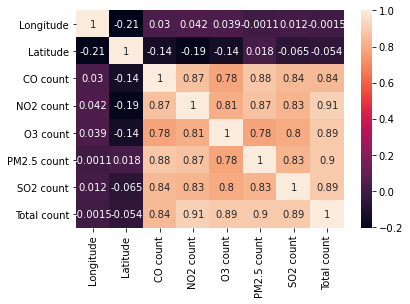

In [10]:
corelation = df.corr()
sns.heatmap(corelation,annot=True)

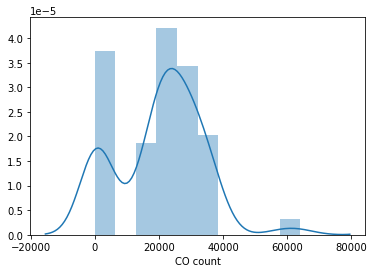

In [11]:
sns.distplot(df['CO count'])

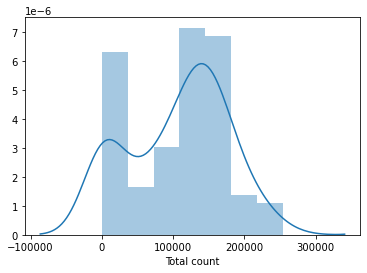

In [12]:
sns.distplot(df['Total count'])

# Box plot for each factor 

Used to identify the outliers 

Text(0.5, 1.0, 'Total count')

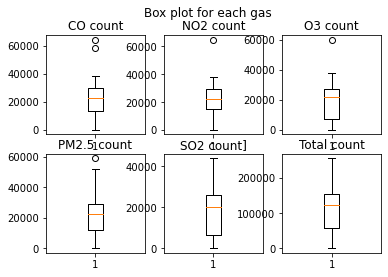

In [13]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Box plot for each gas')
axs[0,0].boxplot(df['CO count'])
axs[0,0].set_title('CO count')
axs[0,1].boxplot(df['NO2 count'])
axs[0,1].set_title('NO2 count')
axs[0,2].boxplot(df['O3 count'])
axs[0,2].set_title('O3 count')
axs[1,0].boxplot(df['PM2.5 count'])
axs[1,0].set_title('PM2.5 count')
axs[1,1].boxplot(df['SO2 count'])
axs[1,1].set_title('SO2 count]')
axs[1,2].boxplot(df['Total count'])
axs[1,2].set_title('Total count')

# Removing Outliers

In [14]:
df = df[df['CO count']<50000]
df = df[df['CO count']>5000]
df.describe()

,Longitude,Latitude,CO count,NO2 count,O3 count,PM2.5 count,SO2 count,Total count
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,77.519827,22.707493,25096.828947,24692.907895,22771.394737,23960.986842,21865.842105,129765.618421
std,1.901271,7.166084,7164.094385,7816.081660,8887.796643,8157.240166,8984.094342,49074.699530
min,72.591910,10.942450,5396.000000,978.000000,1.000000,5397.000000,1063.000000,2990.000000
25%,77.095630,13.047753,20571.750000,20512.750000,18683.000000,18990.500000,17549.000000,109195.750000
50%,77.257680,28.268415,24321.000000,25291.500000,24367.000000,25548.500000,22477.500000,134800.000000
75%,77.591345,28.656300,30729.250000,30340.250000,29087.750000,29822.500000,28035.750000,158600.250000
max,86.945970,31.620000,38014.000000,38292.000000,38005.000000,38015.000000,37525.000000,224357.000000


# Import Libraries for clustering

Analise the carbon mono-oxide and nitrogen di-oxide for a while

In [29]:
from sklearn.cluster import KMeans 
x = df.iloc[:,[4,5]]

# Elbow method 

In [30]:
wcss = []
for i in range (1,6):
    cluster = KMeans(n_clusters = i , init = 'k-means++', random_state=42)
    cluster.fit(x)
    wcss.append(cluster.inertia_)

# Plot for elbow method 

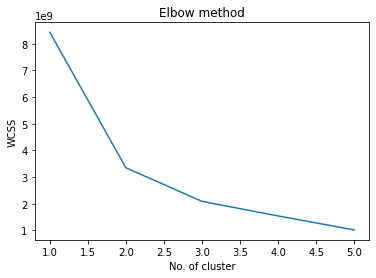

In [31]:
plt.plot(range(1,6),wcss)
plt.title("Elbow method")
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.show()

# Training the Data to make optimum no. of cluster 

In [32]:
cluster = KMeans(n_clusters = 3 , init = 'k-means++' , random_state  = 42)
y_kmeans = cluster.fit_predict(x)

# Visualization of data with optimum no. of cluster

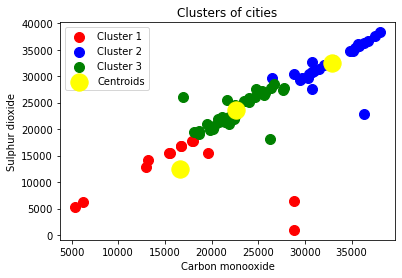

In [37]:
plt.scatter(x.iloc[y_kmeans == 0, 0], x.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x.iloc[y_kmeans == 1, 0], x.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x.iloc[y_kmeans == 2, 0], x.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of cities')
plt.xlabel('Carbon monooxide')
plt.ylabel('Sulphur dioxide')
plt.legend()
plt.show()